In [1]:
import numpy as np 
import pandas as pd
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("news_share_data.xlsx")

In [3]:
df.shape

(1003, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [5]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['day'] = df['published_date'].dt.day
df['month'] = df['published_date'].dt.month
df['year'] = df['published_date'].dt.year

In [8]:
df.describe().round()

article_id  unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
count      1003.0              1003.0     1003.0    1003.0      1003.0   
mean    6915159.0                 1.0       12.0       5.0         1.0   
std      482389.0                 0.0       15.0       8.0         4.0   
min     2195051.0                 0.0        0.0       0.0         0.0   
25%     7006102.0                 0.0        4.0       1.0         0.0   
50%     7013065.0                 1.0        8.0       2.0         0.0   
75%     7027570.0                 1.0       14.0       7.0         1.0   
max     7041291.0                 1.0      162.0      84.0        51.0   

       average_token_length  num_keywords  min_avg_key  max_avg_key  \
count                1003.0        1003.0       1003.0       1003.0   
mean                    5.0           7.0       1131.0       6463.0   
std                     1.0           2.0       1181.0       7455.0   
min                     0.0           2.0          0.0       3569.0   
25%                     4.0           6.0          0.0       3613.0   
50%                     5.0           7.0        984.0       4636.0   
75%                     5.0           9.0       2117.0       6562.0   
max                     7.0          10.0       3613.0     102200.0   

       avg_avg_key  href_avg_shares  global_subjectivity  \
count       1003.0           1003.0               1003.0   
mean        3359.0          13518.0                  0.0   
std         1468.0          51499.0                  0.0   
min         1360.0              0.0                  0.0   
25%         2533.0           1300.0                  0.0   
50%         3005.0           2767.0                  0.0   
75%         3809.0           7341.0                  1.0   
max        17604.0         663600.0                  1.0   

       global_sentiment_polarity  global_rate_positive_words  \
count                     1003.0                      1003.0   
mean                         0.0                         0.0   
std                          0.0                         0.0   
min                         -0.0                         0.0   
25%                          0.0                         0.0   
50%                          0.0                         0.0   
75%                          0.0                         0.0   
max                          0.0                         0.0   

       global_rate_negative_words  title_subjectivity  \
count                      1003.0              1003.0   
mean                          0.0                 0.0   
std                           0.0                 0.0   
min                           0.0                 0.0   
25%                           0.0                 0.0   
50%                           0.0                 0.0   
75%                           0.0                 0.0   
max                           0.0                 1.0   

       title_sentiment_polarity    shares     day   month    year  
count                    1003.0    1003.0  1003.0  1003.0  1003.0  
mean                        0.0    4247.0     9.0     4.0  2014.0  
std                         0.0   22610.0     5.0     0.0     0.0  
min                        -1.0      58.0     1.0     3.0  2014.0  
25%                         0.0    1000.0     4.0     4.0  2014.0  
50%                         0.0    1600.0     9.0     4.0  2014.0  
75%                         0.0    3100.0    14.0     4.0  2014.0  
max                         1.0  663600.0    31.0     4.0  2014.0

In [9]:
cols_to_treat = ["num_hrefs","num_imgs","num_videos","max_avg_key","avg_avg_key","href_avg_shares"]

print("\nDistribution (raw):")
display(df[cols_to_treat].describe())        

# Outlier treatment
def clip_outliers(df,col):
    q_l = df[col].min()
    q_h = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = q_l, upper = q_h)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)
    

print("\nDistribution (after outlier treatment):")
display(df[cols_to_treat].describe())  


Distribution (raw):


num_hrefs     num_imgs   num_videos    max_avg_key   avg_avg_key  \
count  1003.000000  1003.000000  1003.000000    1003.000000   1003.000000   
mean     11.720837     5.188435     1.215354    6463.258234   3359.478830   
std      15.181597     8.495002     4.079730    7455.421154   1467.674637   
min       0.000000     0.000000     0.000000    3568.870000   1360.101000   
25%       4.000000     1.000000     0.000000    3613.040000   2533.297000   
50%       8.000000     2.000000     0.000000    4635.807000   3004.755000   
75%      14.000000     7.000000     1.000000    6561.910000   3809.005000   
max     162.000000    84.000000    51.000000  102200.000000  17604.270000   

       href_avg_shares  
count      1003.000000  
mean      13518.302031  
std       51499.106509  
min           0.000000  
25%        1300.000000  
50%        2766.667000  
75%        7341.000000  
max      663600.000000


Distribution (after outlier treatment):


num_hrefs     num_imgs   num_videos   max_avg_key  avg_avg_key  \
count  1003.000000  1003.000000  1003.000000   1003.000000  1003.000000   
mean     10.395813     4.580259     0.634098   5546.328503  3253.750034   
std       8.264578     5.885661     1.052852   2351.984209  1039.975808   
min       0.000000     0.000000     0.000000   3568.870000  1360.101000   
25%       4.000000     1.000000     0.000000   3613.040000  2533.297000   
50%       8.000000     2.000000     0.000000   4635.807000  3004.755000   
75%      14.000000     7.000000     1.000000   6561.910000  3809.005000   
max      33.000000    21.000000     4.000000  11800.000000  5638.779700   

       href_avg_shares  
count      1003.000000  
mean       7070.637844  
std       11158.376049  
min           0.000000  
25%        1300.000000  
50%        2766.667000  
75%        7341.000000  
max       45940.000000

In [10]:
df['multimedia_content'] = df['num_hrefs'] + df['num_imgs'] + df['num_videos']

In [11]:
import pandas as pd



df['published_date'] = pd.to_datetime(df['published_date'])

df.set_index('published_date', inplace=True)

rolling_average_7days = df['shares'].rolling(window='7D').mean()

# Add the rolling average as a new column
df['rolling_avg_7days'] = rolling_average_7days

# Display the updated DataFrame
df.head()


article_id                                              title  \
published_date                                                                  
2014-03-31         7014291                 It's Time for a YouTube Competitor   
2014-04-01         7014327  The Ultimate Roundup of 2014's Biggest April F...   
2014-04-01         7014304  A Selfie and One Garish Jacket: How the Red So...   
2014-04-01         7031995    African Telecom Proposes More Diverse Emoticons   
2014-04-01         6541359  Google to Launch Improved Android Camera App, ...   

                                                             text  \
published_date                                                      
2014-03-31      It was reported last week that Yahoo is gettin...   
2014-04-01      April Fools' marks the day when pranking goes ...   
2014-04-01      The 2013 World Series champion Boston Red Sox ...   
2014-04-01      Less than a week after Apple pledged to make i...   
2014-04-01      Android users may soon see a series of new fea...   

                unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
published_date                                                        
2014-03-31                0.640816          5         3           1   
2014-04-01                0.549618          4         1           0   
2014-04-01                0.577236          8         1           0   
2014-04-01                0.525896          4         1           0   
2014-04-01                0.588889          6         9           0   

                average_token_length  num_keywords data_channel  min_avg_key  \
published_date                                                                 
2014-03-31                  4.579592             5     Business     1459.500   
2014-04-01                  4.636704             7         Tech        0.000   
2014-04-01                  4.627451             7         Tech     2270.889   
2014-04-01                  5.083665             9         Tech        0.000   
2014-04-01                  4.336022             7        00000     3581.094   

                max_avg_key  avg_avg_key  href_avg_shares  \
published_date                                              
2014-03-31         4817.692     3370.415         1833.333   
2014-04-01         3581.094     2556.367         8500.000   
2014-04-01         3852.800     3018.167         2076.333   
2014-04-01         3581.094     1871.403         2200.000   
2014-04-01         8453.451     5155.323          805.000   

                global_subjectivity  global_sentiment_polarity  \
published_date                                                   
2014-03-31                 0.403762                   0.038762   
2014-04-01                 0.410707                   0.180934   
2014-04-01                 0.397545                   0.044864   
2014-04-01                 0.491578                   0.157620   
2014-04-01                 0.628535                   0.078497   

                global_rate_positive_words  global_rate_negative_words  \
published_date                                                           
2014-03-31                        0.036735                    0.024490   
2014-04-01                        0.044944                    0.003745   
2014-04-01                        0.035294                    0.019608   
2014-04-01                        0.047809                    0.011952   
2014-04-01                        0.053763                    0.034946   

                title_subjectivity  title_sentiment_polarity  shares  day  \
published_date                                                              
2014-03-31                    0.25                      0.25    1600   31   
2014-04-01                    0.00                      0.00    1500    1   
2014-04-01                    0.00                      0.00    1400    1   
2014-04-01                    0.00                      0.00    1300    1   
2014-04-01                    0.0

In [12]:
df.reset_index(inplace=True)

In [13]:
df['weekday'] = df['published_date'].dt.weekday

# Create a new column 'is_weekend' to indicate if it's a weekend (1 for weekend, 0 for weekday)
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [14]:
avg_shares_weekday = df[df['is_weekend'] == 0]['shares'].mean()
avg_shares_weekend = df[df['is_weekend'] == 1]['shares'].mean()

In [15]:
df['avg_shares_per_day'] = df['is_weekend'].apply(lambda x: avg_shares_weekend if x == 1 else avg_shares_weekday)

In [17]:
df.sample(10)

published_date  article_id  \
755     2014-04-14     7025750   
372     2014-04-07     7010223   
796     2014-04-14     7025353   
870     2014-04-15     7004309   
992     2014-04-17     7023018   
685     2014-04-11     7006204   
330     2014-04-06     7010682   
154     2014-04-03     5951302   
968     2014-04-17     6643020   
350     2014-04-07     7010407   

                                                 title  \
755  FTC 'Consumer Complaint' Emails Are Actually S...   
372   Stellar Reviews Aren't Helping HTC's Bottom Line   
796  38 Priceless Twitter Reactions to That NSFW US...   
870  WordPress.com Creator Automattic Seeks $1 Bill...   
992   Firefighters Battle Boredom With Hose Hovercraft   
685  Stephen Colbert's Replacement: A Question Even...   
330  7 Nifty Kitchen Gadgets That Go Inside Your Fr...   
154  An In-Depth Look at the Many Accents of the Br...   
968  Google Releases Android Camera App With Select...   
350  'Battlestar Galactica' Reboot Heading to the B...   

                                                  text  unique_tokens_rate  \
755  No business owner likes to see customer compla...            0.575439   
372  The HTC One, the company's flagship phone that...            0.592982   
796  Whoever sent that US Airways tweet is having a...            0.610119   
870  Who says bloggers don't make any money?\n\nAut...            0.546135   
992  The typical day of a firefighter includes the ...            0.656977   
685  Stephen Colbert's ascent to The Late Show was ...            0.444338   
330  Credit: acrylik\n\nIf you looked in your fridg...            0.584871   
154  "Now say it in a British accent."\n\nWe've all...            0.428571   
968  Google has released a standalone version of it...            0.488797   
350  Good news, Battlestar Galactica fans: Universa...            0.691358   

     num_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
755         11         1           0              4.263975             7   
372          6        21           0              4.437398             7   
796         12        14           0              4.720798             9   
870         11         4           0              4.632754             9   
992          2         0           1              4.242938             6   
685         16         2           0              4.474624            10   
330         14         1           4              4.667851             7   
154          5        10           0              4.535009             7   
968          6         1           4              4.534828             7   
350          3         1           1              4.169697             6   

      data_channel  min_avg_key  max_avg_key  avg_avg_key  href_avg_shares  \
755       Business      927.500     4047.556     3113.877           2825.0   
372  Entertainment     1383.763     4019.599     2891.101           1450.0   
796          00000     2976.921     8355.893     5110.054           9300.0   
870           Tech        0.000     4365.207     2443.938           1236.0   
992  Entertainment      969.800     5291.092     3099.948           1091.5   
685      Lifestyle        0.000     4646.598     2187.662            791.0   
330  Entertainment     2950.209     6250.000     3989.297           3960.0   
154  Entertainment     2019.988     4500.000     3232.665           3025.0   
968  Entertainment        0.000     4448.865     2702.536           1323.0   
350   Social Media     2381.146     6536.429     3715.109           2000.0   

     global_subjectivity  global_sentiment_polarity  \
755             0.541456                   0.090446   
372             0.446380                   0.029125   
796             0.530405                   0.164089   
870             0.472412                   0.139579   
992             0.321134                   0.167677   
685             0.465607                   0.127074   
330             0.433708                   0.06292

In [18]:
category_counts = df['data_channel'].value_counts().to_dict()
df['data_channel_encoded'] = df['data_channel'].map(category_counts)


In [20]:
df["data_channel_encoded"].nunique()

6

In [21]:
df.drop(["published_date","article_id"],axis=1,inplace=True)


In [22]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

In [25]:
def text_prepare(text):
   
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
data_text = df["title"].astype(str).apply(text_prepare)
data_text.head()

0                              time youtube competitor
1      ultimate roundup biggest april fools day pranks
2         selfie one garish jacket red sox white house
3           african telecom proposes diverse emoticons
4    google launch improved android camera app repo...
Name: title, dtype: object

In [26]:
text = " ".join(sent for sent in data_text)
print("There are {} words in the text.".format(len(text)))

There are 44822 words in the text.


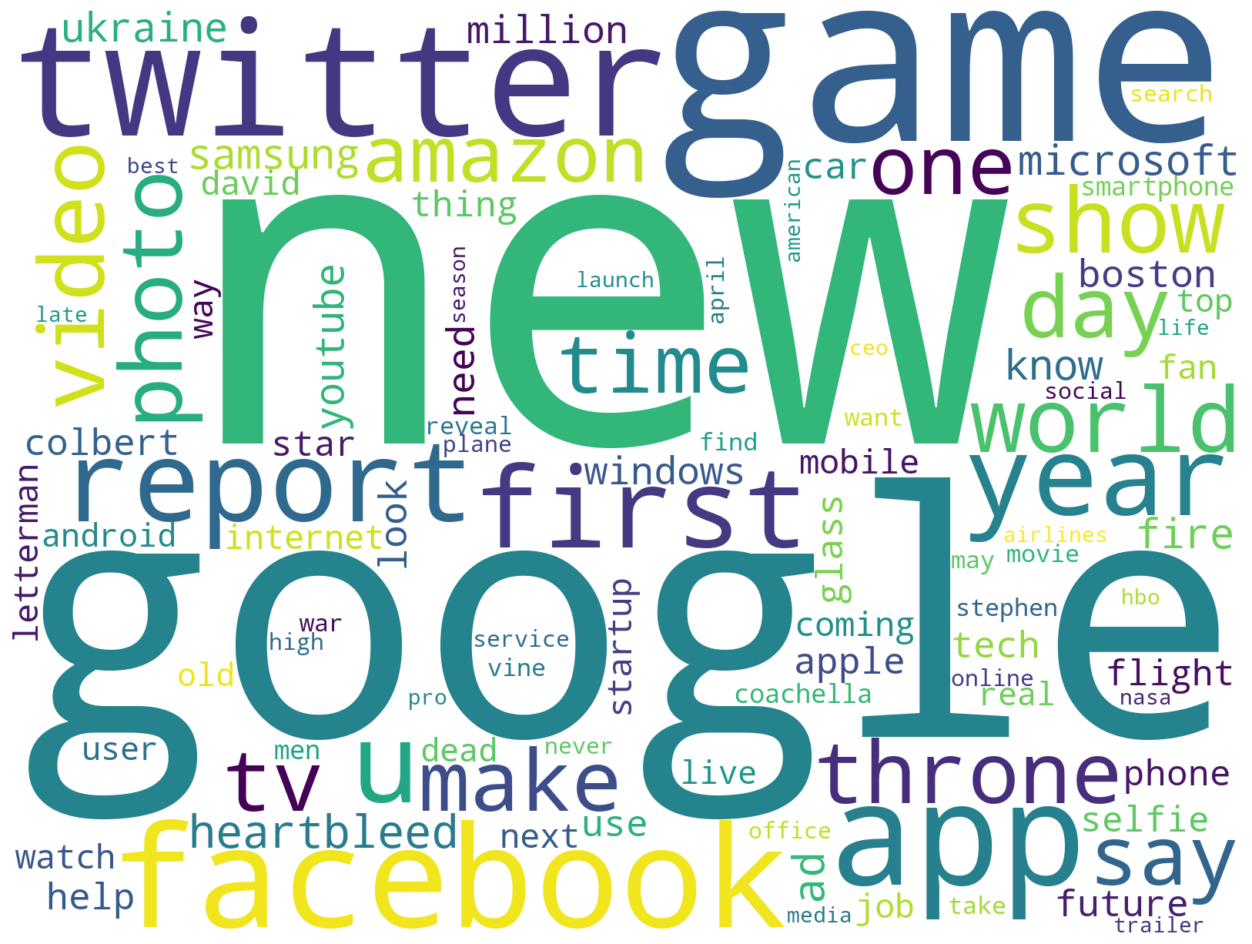

In [27]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [29]:
df["title"] =  df["title"].astype(str).apply(text_prepare)

In [30]:
df['num_tokens_in_title'] = df['title'].str.split().apply(len)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [33]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df["title"])

In [34]:
tfidf_matrix

<1003x3237 sparse matrix of type '<class 'numpy.float64'>'
	with 6440 stored elements in Compressed Sparse Row format>

In [35]:
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

abbey  able  absorbed  abusive   ac  accents  accepted  accident  \
0       0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
1       0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
2       0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
3       0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
4       0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
...     ...   ...       ...      ...  ...      ...       ...       ...   
998     0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
999     0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
1000    0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
1001    0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   
1002    0.0   0.0       0.0      0.0  0.0      0.0       0.0       0.0   

      accidentally  account  accounts  acing  acquire  acquires  acquisition  \
0              0.0      0.0       0.0    0.0      0.0       0.0          0.0   
1              0.0      0.0       0.0    0.0      0.0       0.0          0.0   
2              0.0      0.0       0.0    0.0      0.0       0.0          0.0   
3              0.0      0.0       0.0    0.0      0.0       0.0          0.0   
4              0.0      0.0       0.0    0.0      0.0       0.0          0.0   
...            ...      ...       ...    ...      ...       ...          ...   
998            0.0      0.0       0.0    0.0      0.0       0.0          0.0   
999            0.0      0.0       0.0    0.0      0.0       0.0          0.0   
1000           0.0      0.0       0.0    0.0      0.0       0.0          0.0   
1001           0.0      0.0       0.0    0.0      0.0       0.0          0.0   
1002           0.0      0.0       0.0    0.0      0.0       0.0          0.0   

      action  active  acts  actually   ad  adaptations  adding  adds  adidas  \
0        0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
1        0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
2        0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
3        0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
4        0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
...      ...     ...   ...       ...  ...          ...     ...   ...     ...   
998      0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
999      0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
1000     0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
1001     0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   
1002     0.0     0.0   0.0       0.0  0.0          0.0     0.0   0.0     0.0   

      admits  adobe  adopted  adoption  adorable  adorably  ads  adulthood  \
0        0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
1        0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
2        0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
3        0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
4        0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
...      ...    ...      ...       ...       ...       ...  ...        ...   
998      0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
999      0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
1000     0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
1001     0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   
1002     0.0    0.0      0.0       0.0       0.0       0.0  0.0        0.0   

      adults  advances  adventure  advertising  aereo  aerosmith  affordable  \
0        0.0       0.0        0.0          0.0    0.0        0.0         0.0   
1        0.0       0.0        0.0          0.0    0.0        0.0         0.0   
2        0.0      

In [36]:
feature_names = tfidf_vectorizer.get_feature_names_out()
top_50_words = [feature_names[i] for i in tfidf_df.sum(axis=0).argsort()[::-1][:50]]

In [37]:
top_50_words

['google',
 'new',
 'twitter',
 'game',
 'facebook',
 'report',
 'world',
 'thrones',
 'tv',
 'first',
 'amazon',
 'heartbleed',
 'video',
 'one',
 'microsoft',
 'need',
 'know',
 'samsung',
 'year',
 'youtube',
 'day',
 'like',
 'apps',
 'photos',
 'show',
 'windows',
 'app',
 'make',
 'fire',
 'boston',
 'glass',
 'says',
 'get',
 'time',
 'ukraine',
 'million',
 'colbert',
 'future',
 'tech',
 'internet',
 'apple',
 'coming',
 'letterman',
 'david',
 'phone',
 'next',
 'mobile',
 'ad',
 'coachella',
 'look']

In [38]:
tfidf_vectorizer_top_50 = TfidfVectorizer(vocabulary=top_50_words)

# Fit and transform the text data into a TF-IDF representation using the top 50 features
tfidf_matrix_top_50 = tfidf_vectorizer_top_50.fit_transform(df["title"])

# Convert TF-IDF matrix to a DataFrame for demonstration (optional)
tfidf_df_top_50 = pd.DataFrame(tfidf_matrix_top_50.toarray(), columns=top_50_words)

tfidf_df_top_50

google  new  twitter  game  facebook   report  world  thrones   tv  \
0     0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
1     0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
2     0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
3     0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
4     0.431450  0.0      0.0   0.0       0.0  0.48775    0.0      0.0  0.0   
...        ...  ...      ...   ...       ...      ...    ...      ...  ...   
998   0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
999   0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
1000  0.665492  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
1001  0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   
1002  0.000000  0.0      0.0   0.0       0.0  0.00000    0.0      0.0  0.0   

         first  amazon  heartbleed  video  one  microsoft  need  know  \
0     0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
1     0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
2     0.000000     0.0         0.0    0.0  1.0        0.0   0.0   0.0   
3     0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
4     0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
...        ...     ...         ...    ...  ...        ...   ...   ...   
998   0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
999   0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
1000  0.746405     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
1001  0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   
1002  0.000000     0.0         0.0    0.0  0.0        0.0   0.0   0.0   

      samsung  year   youtube  day  like     apps  photos  show  windows  \
0         0.0   0.0  0.702899  0.0   0.0  0.00000     0.0   0.0      0.0   
1         0.0   0.0  0.000000  1.0   0.0  0.00000     0.0   0.0      0.0   
2         0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
3         0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
4         0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
...       ...   ...       ...  ...   ...      ...     ...   ...      ...   
998       0.0   0.0  0.000000  0.0   0.0  0.71129     0.0   0.0      0.0   
999       0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
1000      0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
1001      0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   
1002      0.0   0.0  0.000000  0.0   0.0  0.00000     0.0   0.0      0.0   

           app      make  fire  boston  glass      says  get     time  \
0     0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.71129   
1     0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
2     0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
3     0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
4     0.536634  0.000000   0.0     0.0    0.0  0.536634  0.0  0.00000   
...        ...       ...   ...     ...    ...       ...  ...      ...   
998   0.000000  0.702899   0.0     0.0    0.0  0.000000  0.0  0.00000   
999   0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
1000  0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
1001  0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   
1002  0.000000  0.000000   0.0     0.0    0.0  0.000000  0.0  0.00000   

      ukraine  million  colbert  future  tech  internet  apple  coming  \
0         0.0      0.0      0.0     0.0   0.0       0.0    0.0     0.0   
1         0.0      0.0      0.0     0.0   0.0       0.0    0.0     0.0   
2         0.0      0.0      0.0     0.0   0.0       0.0    0.0     0.0   
3         0.0      0.0      0.0     0.0   0.0       0.0    0.0     0.0   
4         0.0      0.0      0.0   

In [39]:
def text_prepare(text):
   
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
data_text = df["text"].astype(str).apply(text_prepare)
data_text.head()

0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
2    world series champion boston red sox visited w...
3    less week apple pledged make emoticons raciall...
4    android users may soon see series new features...
Name: text, dtype: object

In [40]:
text = " ".join(sent for sent in data_text)
print("There are {} words in the text.".format(len(text)))

There are 1796245 words in the text.


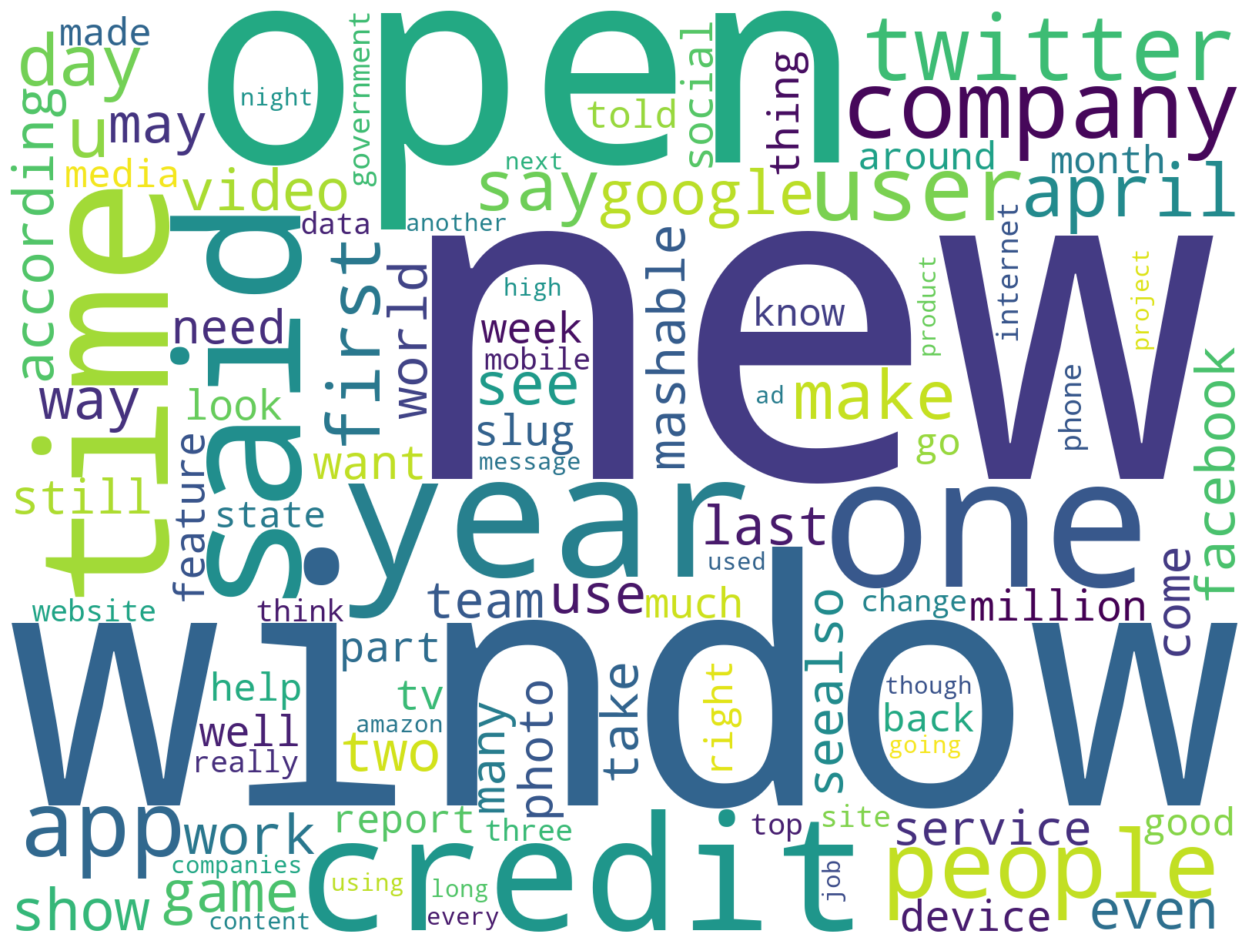

In [41]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [43]:
df["text"] =  df["text"].astype(str).apply(text_prepare)

In [45]:
df['num_tokens_in_text'] = df['text'].str.split().apply(len)

In [46]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [47]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df["text"])

In [48]:
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

aacus  aaron  abbott  abc  abilities  ability     able  aboard  \
0       0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
1       0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
2       0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
3       0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
4       0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
...     ...    ...     ...  ...        ...      ...      ...     ...   
998     0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
999     0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
1000    0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   
1001    0.0    0.0     0.0  0.0        0.0      0.0  0.09121     0.0   
1002    0.0    0.0     0.0  0.0        0.0      0.0  0.00000     0.0   

      absolutely  abuse   ac  academic  academy  accept  accepted    access  \
0            0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
1            0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
2            0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
3            0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
4            0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
...          ...    ...  ...       ...      ...     ...       ...       ...   
998          0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
999          0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
1000         0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   
1001         0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.024916   
1002         0.0    0.0  0.0       0.0      0.0     0.0       0.0  0.000000   

      accessible  accessing  accessories  accessory  accident  accidentally  \
0            0.0        0.0          0.0        0.0       0.0           0.0   
1            0.0        0.0          0.0        0.0       0.0           0.0   
2            0.0        0.0          0.0        0.0       0.0           0.0   
3            0.0        0.0          0.0        0.0       0.0           0.0   
4            0.0        0.0          0.0        0.0       0.0           0.0   
...          ...        ...          ...        ...       ...           ...   
998          0.0        0.0          0.0        0.0       0.0           0.0   
999          0.0        0.0          0.0        0.0       0.0           0.0   
1000         0.0        0.0          0.0        0.0       0.0           0.0   
1001         0.0        0.0          0.0        0.0       0.0           0.0   
1002         0.0        0.0          0.0        0.0       0.0           0.0   

      accomplish  according  account  accounts  accused  achieve  \
0            0.0        0.0      0.0       0.0      0.0      0.0   
1            0.0        0.0      0.0       0.0      0.0      0.0   
2            0.0        0.0      0.0       0.0      0.0      0.0   
3            0.0        0.0      0.0       0.0      0.0      0.0   
4            0.0        0.0      0.0       0.0      0.0      0.0   
...          ...        ...      ...       ...      ...      ...   
998          0.0        0.0      0.0       0.0      0.0      0.0   
999          0.0        0.0      0.0       0.0      0.0      0.0   
1000         0.0        0.0      0.0       0.0      0.0      0.0   
1001         0.0        0.0      0.0       0.0      0.0      0.0   
1002         0.0        0.0      0.0       0.0      0.0      0.0   

      acknowledged  acoustic  acquired  acquisition  acquisitions    across  \
0              0.0       0.0       0.0     0.103115           0.0  0.000000   
1              0.0       0.0       0.0     0.000000           0.0  0.000000   
2              0.0       0.0       0.0     0.000000           0.0  0.000000   
3              0.0       0.0       0.0     0.000000           0.0  0.044843   
4              0.0       0.0   

In [49]:
feature_names = tfidf_vectorizer.get_feature_names_out()
top_50_words = [feature_names[i] for i in tfidf_df.sum(axis=0).argsort()[::-1][:50]]

In [50]:
top_50_words

['new',
 'window',
 'opens',
 'twitter',
 'one',
 'said',
 'google',
 'time',
 'also',
 'like',
 'credit',
 'company',
 'april',
 'game',
 'year',
 'facebook',
 'people',
 'app',
 'video',
 'first',
 'would',
 'users',
 'show',
 'see',
 'seealso',
 'slug',
 'day',
 'mashable',
 'according',
 'world',
 'could',
 'two',
 'get',
 'bonus',
 'may',
 'million',
 'last',
 'tv',
 'social',
 'says',
 'even',
 'way',
 'make',
 'youtube',
 'thrones',
 'amazon',
 'top',
 'apps',
 'id',
 'us']

In [51]:
tfidf_vectorizer_top_501 = TfidfVectorizer(vocabulary=top_50_words)

# Fit and transform the text data into a TF-IDF representation using the top 50 features
tfidf_matrix_top_501 = tfidf_vectorizer_top_501.fit_transform(df["title"])

# Convert TF-IDF matrix to a DataFrame for demonstration (optional)
tfidf_df_top_501 = pd.DataFrame(tfidf_matrix_top_501.toarray(), columns=top_50_words)

tfidf_df_top_501

new  window  opens  twitter  one  said    google     time  also  like  \
0     0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.71129   0.0   0.0   
1     0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   
2     0.0     0.0    0.0      0.0  1.0   0.0  0.000000  0.00000   0.0   0.0   
3     0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   
4     0.0     0.0    0.0      0.0  0.0   0.0  0.494224  0.00000   0.0   0.0   
...   ...     ...    ...      ...  ...   ...       ...      ...   ...   ...   
998   0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   
999   0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   
1000  0.0     0.0    0.0      0.0  0.0   0.0  0.665492  0.00000   0.0   0.0   
1001  0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   
1002  0.0     0.0    0.0      0.0  0.0   0.0  0.000000  0.00000   0.0   0.0   

      credit  company     april  game  year  facebook  people       app  \
0        0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
1        0.0      0.0  0.748642   0.0   0.0       0.0     0.0  0.000000   
2        0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
3        0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
4        0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.614712   
...      ...      ...       ...   ...   ...       ...     ...       ...   
998      0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
999      0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
1000     0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
1001     0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
1002     0.0      0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   

      video     first  would  users  show  see  seealso  slug       day  \
0       0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
1       0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.662975   
2       0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
3       0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
4       0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
...     ...       ...    ...    ...   ...  ...      ...   ...       ...   
998     0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
999     0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
1000    0.0  0.746405    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
1001    0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   
1002    0.0  0.000000    0.0    0.0   0.0  0.0      0.0   0.0  0.000000   

      mashable  according  world  could  two  get  bonus  may  million  last  \
0          0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
1          0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
2          0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
3          0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
4          0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
...        ...        ...    ...    ...  ...  ...    ...  ...      ...   ...   
998        0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
999        0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
1000       0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
1001       0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   
1002       0.0        0.0    0.0    0.0  0.0  0.0    0.0  0.0      0.0   0.0   

       tv  social      says  even  way      make   youtube  thrones  amazon  \
0     0.0     0.0  0.000000   0.0  0.0  0.000000  0.702899      0.0     0.0   
1     0.0     0.0  0.000000   0.0  0.0  0.000000  0.000000      0.0     0.0   
2     0.0     0.0  0.000000   0.0  0.0  0.000000  0.00000

In [53]:
data=df.copy()

In [55]:
data.shape

(1003, 31)

In [57]:
data.drop(["title","text"],axis=1,inplace=True)

In [59]:
category_counts = data['data_channel'].value_counts().to_dict()
data['data_channel_encoded'] = data['data_channel'].map(category_counts)

In [61]:
data.drop("data_channel",axis=1,inplace=True)

In [81]:
data

unique_tokens_rate  num_hrefs  num_imgs  num_videos  \
0               0.640816          5         3           1   
1               0.549618          4         1           0   
2               0.577236          8         1           0   
3               0.525896          4         1           0   
4               0.588889          6         9           0   
...                  ...        ...       ...         ...   
998             0.606557          6         2           0   
999             0.491018          4         2           0   
1000            0.634518          3         0           2   
1001            0.447368          7         1           0   
1002            0.480412          5         2           0   

      average_token_length  num_keywords  min_avg_key  max_avg_key  \
0                 4.579592             5     1459.500     4817.692   
1                 4.636704             7        0.000     3581.094   
2                 4.627451             7     2270.889     3852.800   
3                 5.083665             9        0.000     3581.094   
4                 4.336022             7     3581.094     8453.451   
...                    ...           ...          ...          ...   
998               4.913978             4     3329.921     5709.823   
999               4.674627             6        0.000     4352.491   
1000              4.177665             9     2126.118     6060.771   
1001              4.667961             8        0.000     4763.083   
1002              4.429126             5     1404.841     3610.125   

      avg_avg_key  href_avg_shares  global_subjectivity  \
0        3370.415         1833.333             0.403762   
1        2556.367         8500.000             0.410707   
2        3018.167         2076.333             0.397545   
3        1871.403         2200.000             0.491578   
4        5155.323          805.000             0.628535   
...           ...              ...                  ...   
998      4020.608         1950.000             0.493519   
999      2358.572         4200.000             0.455042   
1000     3296.052         3400.000             0.522917   
1001     2709.129            0.000             0.494445   
1002     2717.930         1100.000             0.296896   

      global_sentiment_polarity  global_rate_positive_words  \
0                      0.038762                    0.036735   
1                      0.180934                    0.044944   
2                      0.044864                    0.035294   
3                      0.157620                    0.047809   
4                      0.078497                    0.053763   
...                         ...                         ...   
998                   -0.119440                    0.005376   
999                    0.191196                    0.053731   
1000                   0.009809                    0.025381   
1001                   0.144969                    0.069903   
1002                   0.082484                    0.029126   

      global_rate_negative_words  title_subjectivity  \
0                       0.024490            0.250000   
1                       0.003745            0.000000   
2                       0.019608            0.000000   
3                       0.011952            0.000000   
4                       0.034946            0.000000   
...                          ...                 ...   
998                     0.021505            0.000000   
999                     0.011940            0.000000   
1000                    0.045685            0.600000   
1001                    0.020388            0.833333   
1002                    0.023301            0.333333   

      title_sentiment_polarity  shares  day  month  year  multimedia_content  \
0                     0.250000    1600   31      3  2014                   9   
1                     0.000000    1500    1      4  2014                   5   
2                     0.000000    1400    1      4  2

In [73]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(columns=['shares'])  #
y = data['shares']  

rf_model = RandomForestRegressor()

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.round(2)


Feature  Importance
26          num_tokens_in_text        0.27
0           unique_tokens_rate        0.10
4         average_token_length        0.08
10         global_subjectivity        0.07
21                     weekday        0.07
20           rolling_avg_7days        0.07
9              href_avg_shares        0.05
8                  avg_avg_key        0.03
5                 num_keywords        0.03
12  global_rate_positive_words        0.03
1                    num_hrefs        0.02
15    title_sentiment_polarity        0.02
2                     num_imgs        0.02
19          multimedia_content        0.02
25         num_tokens_in_title        0.02
7                  max_avg_key        0.02
6                  min_avg_key        0.01
11   global_sentiment_polarity        0.01
24        data_channel_encoded        0.01
13  global_rate_negative_words        0.01
14          title_subjectivity        0.01
16                         day        0.01
3                   num_videos        0.01
22                  is_weekend        0.01
23          avg_shares_per_day        0.00
17                       month        0.00
18                        year        0.00

In [74]:
# Set the threshold for feature importance
threshold = 0.02

# Filter features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

# Display the selected features
print(selected_features)


26            num_tokens_in_text
0             unique_tokens_rate
4           average_token_length
10           global_subjectivity
21                       weekday
20             rolling_avg_7days
9                href_avg_shares
8                    avg_avg_key
5                   num_keywords
12    global_rate_positive_words
1                      num_hrefs
15      title_sentiment_polarity
2                       num_imgs
19            multimedia_content
Name: Feature, dtype: object


In [77]:
compressed_feature=['num_tokens_in_text', 'unique_tokens_rate', 'average_token_length','global_subjectivity', 'weekday', 'rolling_avg_7days','href_avg_shares', 'avg_avg_key', 'num_keywords','global_rate_positive_words', 'num_hrefs','title_sentiment_polarity', 'num_imgs', 'multimedia_content']

In [82]:
concatenated_df = pd.concat([data[compressed_feature], tfidf_df_top_50, tfidf_df_top_501], axis=1, ignore_index=False)

In [84]:
concatenated_df.shape

(1003, 114)

In [86]:
data["shares"].shape

(1003,)

In [87]:
c

Best Alpha: 10
Mean Squared Error: 2177372170.943757
Root Mean Squared Error: 46662.32067679186
R-squared (R2) Score: -0.0006734276630084857


In [89]:
from sklearn.ensemble import RandomForestRegressor

X = concatenated_df  # Remove the target variable 'shares'
y = data['shares']  # Target variable

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Fit the model on your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)


                  Feature  Importance
0      num_tokens_in_text    0.250385
1      unique_tokens_rate    0.100292
4                 weekday    0.068309
2    average_token_length    0.050863
6         href_avg_shares    0.046660
..                    ...         ...
97                  bonus    0.000000
92              according    0.000000
89                   slug    0.000000
88                seealso    0.000000
112                    id    0.000000

[114 rows x 2 columns]


In [91]:
threshold = 0.01

selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

X_selected = X[selected_features]

print(selected_features)

0              num_tokens_in_text
1              unique_tokens_rate
4                         weekday
2            average_token_length
6                 href_avg_shares
84                          would
9      global_rate_positive_words
5               rolling_avg_7days
3             global_subjectivity
106                          make
41                           make
7                     avg_avg_key
8                    num_keywords
11       title_sentiment_polarity
16                        twitter
13             multimedia_content
10                      num_hrefs
67                        twitter
62                      coachella
104                          even
12                       num_imgs
48                        ukraine
Name: Feature, dtype: object


In [92]:
selected_features.values

array(['num_tokens_in_text', 'unique_tokens_rate', 'weekday',
       'average_token_length', 'href_avg_shares', 'would',
       'global_rate_positive_words', 'rolling_avg_7days',
       'global_subjectivity', 'make', 'make', 'avg_avg_key',
       'num_keywords', 'title_sentiment_polarity', 'twitter',
       'multimedia_content', 'num_hrefs', 'twitter', 'coachella', 'even',
       'num_imgs', 'ukraine'], dtype=object)

In [98]:
new_comprased=concatenated_df[['num_tokens_in_text', 'unique_tokens_rate', 'weekday','average_token_length', 'href_avg_shares', 'would','global_rate_positive_words', 'rolling_avg_7days','global_subjectivity', 'make', 'make', 'avg_avg_key','num_keywords', 'title_sentiment_polarity', 'twitter','multimedia_content', 'num_hrefs', 'twitter', 'coachella', 'even','num_imgs', 'ukraine']]

In [101]:
new_comprased

num_tokens_in_text  unique_tokens_rate  weekday  average_token_length  \
0                    103            0.640816        0              4.579592   
1                     52            0.549618        1              4.636704   
2                    244            0.577236        1              4.627451   
3                    143            0.525896        1              5.083665   
4                    149            0.588889        1              4.336022   
...                  ...                 ...      ...                   ...   
998                   49            0.606557        3              4.913978   
999                  128            0.491018        3              4.674627   
1000                  83            0.634518        3              4.177665   
1001                 444            0.447368        3              4.667961   
1002                 131            0.480412        3              4.429126   

      href_avg_shares  would  global_rate_positive_words  rolling_avg_7days  \
0            1833.333    0.0                    0.036735        1600.000000   
1            8500.000    0.0                    0.044944        1550.000000   
2            2076.333    0.0                    0.035294        1500.000000   
3            2200.000    0.0                    0.047809        1450.000000   
4             805.000    0.0                    0.053763        1760.000000   
...               ...    ...                         ...                ...   
998          1950.000    0.0                    0.005376        4092.347945   
999          4200.000    0.0                    0.053731        4084.172131   
1000         3400.000    0.0                    0.025381        4085.032698   
1001            0.000    0.0                    0.069903        4079.095109   
1002         1100.000    0.0                    0.029126        4070.612466   

      global_subjectivity      make      make      make      make  \
0                0.403762  0.000000  0.000000  0.000000  0.000000   
1                0.410707  0.000000  0.000000  0.000000  0.000000   
2                0.397545  0.000000  0.000000  0.000000  0.000000   
3                0.491578  0.000000  0.000000  0.000000  0.000000   
4                0.628535  0.000000  0.000000  0.000000  0.000000   
...                   ...       ...       ...       ...       ...   
998              0.493519  0.702899  0.702899  0.702899  0.702899   
999              0.455042  0.000000  0.000000  0.000000  0.000000   
1000             0.522917  0.000000  0.000000  0.000000  0.000000   
1001             0.494445  0.000000  0.000000  0.000000  0.000000   
1002             0.296896  0.000000  0.000000  0.000000  0.000000   

      avg_avg_key  num_keywords  title_sentiment_polarity  twitter  twitter  \
0        3370.415             5                  0.250000      0.0      0.0   
1        2556.367             7                  0.000000      0.0      0.0   
2        3018.167             7                  0.000000      0.0      0.0   
3        1871.403             9                  0.000000      0.0      0.0   
4        5155.323             7                  0.000000      0.0      0.0   
...           ...           ...                       ...      ...      ...   
998      4020.608             4                  0.000000      0.0      0.0   
999      2358.572             6                  0.000000      0.0      0.0   
1000     3296.052             9                 -0.600000      0.0      0.0   
1001     2709.129             8                  0.433333      0.0      0.0   
1002     2717.930             5                  0.250000      0.0      0.0   

      multimedia_content  num_hrefs  twitter  twitter  coachella  even  \
0                      9          5      0.0      0.0        0.0   0.0   
1                      5          4      0.0      0.0        0.0   0.0   
2                      9          8      0.0      0.0        0.0   0.0   
3                      5          

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



X = new_comprased  
y = data["shares"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()

alphas = [0.01, 0.1, 1, 10]

param_grid = {'alpha': alphas}

lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Best Alpha: 10
Mean Squared Error: 2180316252.716038
Root Mean Squared Error: 46693.856691389694
R-squared (R2) Score: -0.00202646433616116
